<a href="https://colab.research.google.com/github/Nouran-saad/Task6-DecisionTree-SparksIntern/blob/main/Team4_18p4496_DataMiningProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all needed Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the stroke dataset (downloaded from kaggle.com)

In [71]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [72]:
stroke_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Preprocessing

### drop column id has no meaning in prediction  

In [73]:
stroke_data = stroke_data.drop('id', axis=1)

### Check if there is any NULL (how many and which attributes)

In [74]:
stroke_data.isnull().values.sum()

201

In [75]:
stroke_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### There are some values in smoking status unknown so we replace it by null to be handled as missing values

In [76]:
stroke_data['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [77]:
stroke_data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

 ###  heatmap to see graphically where we are missing data.

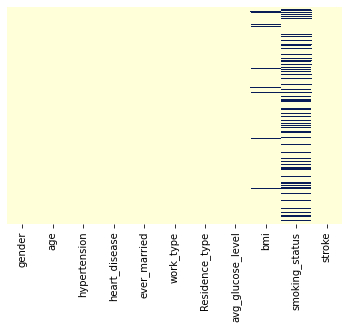

In [78]:

sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.show()

### information about 'bmi' and 'smoking_statues 'attributes to know the mean for some preprocessing

In [79]:
stroke_data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [80]:
stroke_data['smoking_status'].describe()

count             3566
unique               3
top       never smoked
freq              1892
Name: smoking_status, dtype: object

### replace any null values with the **mean** of the attribute 
### check if there no null value exist and graph it (heatmap)

In [81]:
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace = True)
stroke_data['smoking_status'].fillna(stroke_data['bmi'].mean(), inplace = True)

In [82]:
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

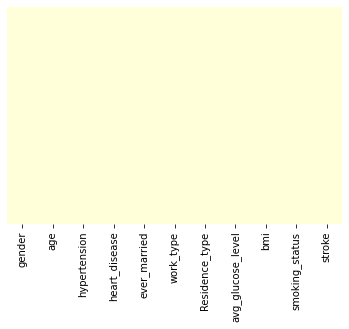

In [83]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### drop any record has value 'others' in gender because it has no meaning

In [84]:
stroke_data[stroke_data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [85]:
stroke_data.drop(labels=3116,axis=0,inplace=True)

### check if any 'other' value in gender successfully dropped 

In [86]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Check if there is any duplicate data and seems it has no duplicate so we don't need to handle it.

In [87]:
stroke_data.duplicated().values.sum()


0

Explore the data to find the outliers in the numerical attributres


*   age doesn't have any outliers
*   avg_glucose_level and bmi atrributes have outliers 



In [88]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


###  **Unbalanced output** can be happened because of the outliers so we show the box plot with the outliers and we handle it in some steps later

In [89]:
stroke_data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

### Pie chart for better visualization of the output feature (**stroke**)

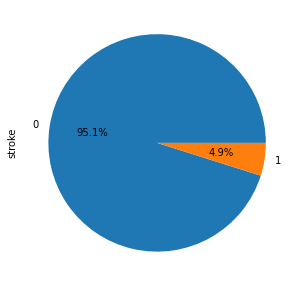

In [95]:

plt.figure(figsize=(5,5))
stroke_data['stroke'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

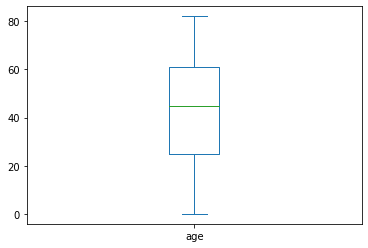

In [90]:
stroke_data['age'].plot(kind = 'box')

plt.show()



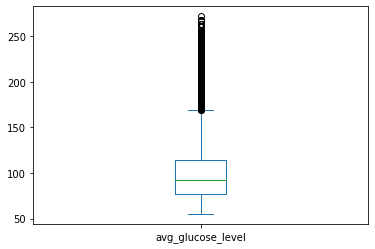

In [91]:
stroke_data['avg_glucose_level'].plot(kind = 'box')

plt.show()

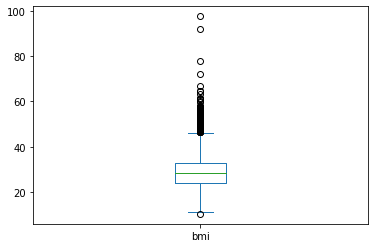

In [92]:
stroke_data['bmi'].plot(kind = 'box')
plt.show()

## Visualize the data

### Show the correaltion between the features ranges from negative one to positive one
### from lighter color (values closer to zero) we deduce there is no correlation between features as we go close to positive one (darker colors) there a strong + correlation between the features (as one increases so does the other) and close to negative one is a strong - correlation (as one increases the other decrease)
### at the diagonal are all one because the features correalted to itself
### **Result** the highest correlation is 33%  between bmi and age and also the age highly correlated with all the features so it's a crtical featUre

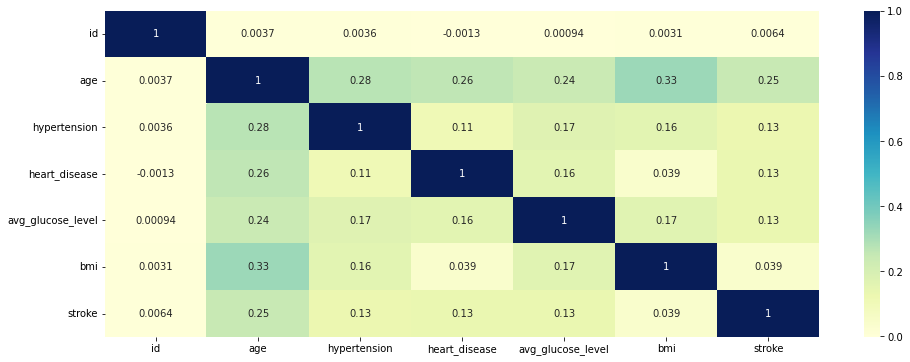

In [68]:

plt.figure(figsize=(16, 6))
correlated_features=stroke_data.corr()
sns.heatmap(correlated_features,cmap='YlGnBu',annot=True)

plt.show()

### Numerical Features Distribution

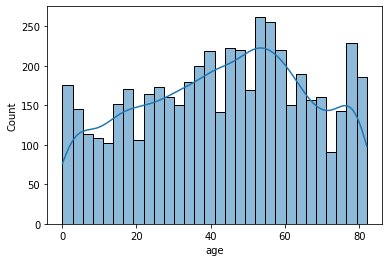

In [49]:
sns.histplot(stroke_data['age'],kde=True,bins=30)
plt.show()

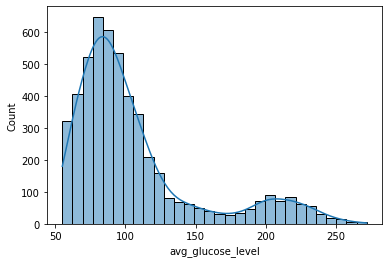

In [93]:
sns.histplot(stroke_data['avg_glucose_level'],kde=True,bins=30)
plt.show()

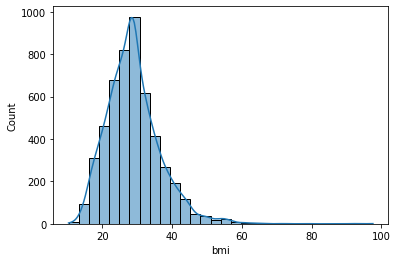

In [94]:
sns.histplot(stroke_data['bmi'],kde=True,bins=30)
plt.show()

### Categorical and binary features distribution

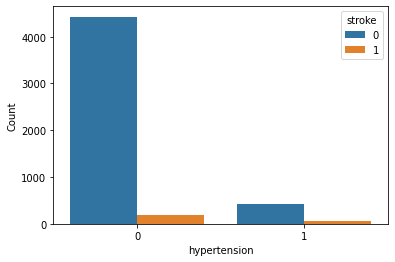

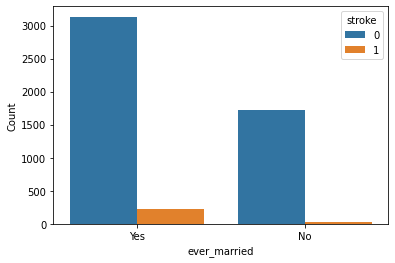

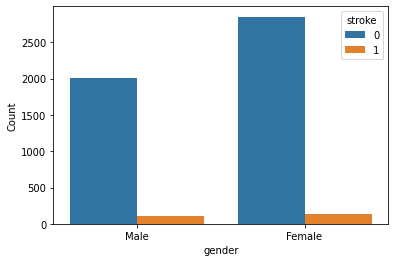

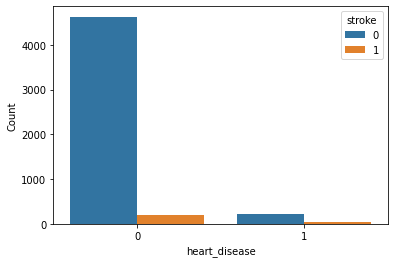

In [96]:
categorical_binary = ['hypertension', 'ever_married','gender','heart_disease']
for i in categorical_binary:
    sns.countplot(x=i , hue= 'stroke', data= stroke_data )

    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [97]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()